In [ ]:
# Environment Requirements
# This notebook requires Python 3.10
# Check your Python version
import sys
print(f"Python version: {sys.version}")

# Check syndirella version (must be >=4.0.0)
!pip show syndirella

from rdkit.Chem.rdChemReactions import ReactionFromSmarts
import json

# install syndirella if not already installed
#! pip install --upgrade syndirella

from syndirella.route.SmirksLibraryManager import SmirksLibraryManager  

In [13]:
# First save copy of original reaction smirks library to rollback to
manager = SmirksLibraryManager(smirks_library_path='../../syndirella/constants/RXN_SMIRKS_CONSTANTS.json')
# Save copy of original reaction smirks library
# Save a backup of the original reaction SMIRKS library for rollback
original_library_path = '../../syndirella/constants/RXN_SMIRKS_CONSTANTS_original.json'
with open(original_library_path, 'w') as backup_file:
    json.dump(manager.smirks_data, backup_file, indent=2)

2025-08-12 10:56:23,803 - syndirella.route.SmirksLibraryManager - INFO - Loaded USPTO lookup from compressed file
2025-08-12 10:56:23,803 - syndirella.route.SmirksLibraryManager - INFO - Loaded 109 total reactions
2025-08-12 10:56:23,804 - syndirella.route.SmirksLibraryManager - INFO - Loaded USPTO mappings for 41645 template codes


## Reaction Library

Syndirella has a comprehensive reaction SMIRKS library specifically curated for HT synthesis. There are two main sources, either `manual` ones I and my colleagues have curated or from the `rxn-insight` paper, https://github.com/mrodobbe/Rxn-INSIGHT.

In [14]:
# Let's take a look
smirks_library_path = '../../syndirella/constants/RXN_SMIRKS_CONSTANTS.json'
SmirksLibraryManager(smirks_library_path=smirks_library_path).get_library_stats()

2025-08-12 10:56:40,849 - syndirella.route.SmirksLibraryManager - INFO - Loaded USPTO lookup from compressed file
2025-08-12 10:56:40,852 - syndirella.route.SmirksLibraryManager - INFO - Loaded 109 total reactions
2025-08-12 10:56:40,853 - syndirella.route.SmirksLibraryManager - INFO - Loaded USPTO mappings for 41645 template codes


{'total_reactions': 109,
 'manual_reactions': 33,
 'rxn-insight_reactions': 76,
 'parent_reactions': 33,
 'child_reactions': 76,
 'uspto_templates_total': 41645,
 'uspto_templates_with_mappings': 41645,
 'total_uspto_mappings': 904206,
 'parent_child_relationships': 27}

## Simple Reaction

Let's add Hantzsch thiazole synthesis (which is a reaction already in the library but we will just use it as an example.) 

[a,A:1]-[C](=[S:4])-[N&H2].[a,A:3]-[C:5](=[O])-[C;H1:6](-[$([Cl,Br,I]),$(OS(=O)(=O)C),$(OS(=O)(=O)c1ccc(C)cc1)])-[a,A:2]>>[c]-1([a,A:1])-[s:4]-[c:6](-[a,A:2])-[c:5](-[a,A:3])-[n]-1


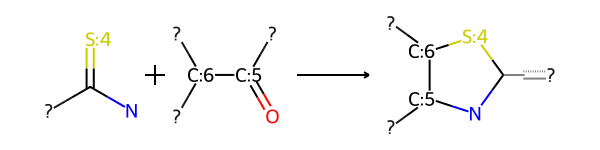

In [15]:
hantz = "[a,A:1]-[C](=[S:4])-[N&H2].[a,A:3]-[C:5](=[O])-[C;H1:6](-[$([Cl,Br,I]),$(OS(=O)(=O)C),$(OS(=O)(=O)c1ccc(C)cc1)])-[a,A:2]>>[c]-1([a,A:1])-[s:4]-[c:6](-[a,A:2])-[c:5](-[a,A:3])-[n]-1"
rxn = ReactionFromSmarts(hantz)
print(hantz)
rxn

In [ ]:
!syndirella add-reaction --name Hantzsch_thiazole_synthesis_2 --smirks '[a,A:1]-[C](=[S:4])-[N&H2].[a,A:3]-[C:5](=[O])-[C;H1:6](-[$([Cl,Br,I]),$(OS(=O)(=O)C),$(OS(=O)(=O)c1ccc(C)cc1)])-[a,A:2]>>[c]-1([a,A:1])-[s:4]-[c:6](-[a,A:2])-[c:5](-[a,A:3])-[n]-1'

## Adding a Child Reaction with Parent

You can also specify to `find_parent` where this reaction will be assumed to be a more specific version of a general reaction. This functionality was specifically implemented so there is a higher probability of matching a named template to a given template used by AiZynthFinder. But this reaction is also linked to the more general reaction so in the elaboration synthesis, more elaborated and diverse reactants will be considered valid for the reaction. 

In [ ]:
!syndirella add-reaction --name Hantzsch_thiazole_synthesis_3 --smirks '[a,A:1]-[C](=[S:4])-[N&H2].[a,A:3]-[C:5](=[O])-[C;H1:6](-[$([Cl,Br,I]),$(OS(=O)(=O)C),$(OS(=O)(=O)c1ccc(C)cc1)])-[a,A:2]>>[c]-1([a,A:1])-[s:4]-[c:6](-[a,A:2])-[c:5](-[a,A:3])-[n]-1' --find_parent

## Validate

In [18]:
# Check if reaction was added
manager = SmirksLibraryManager(smirks_library_path='../../syndirella/constants/RXN_SMIRKS_CONSTANTS.json')
if "Hantzsch_thiazole_synthesis_2" in manager.smirks_data:
    print("Hantzsch_thiazole_synthesis_2 reaction was added")
    print(manager.get_reaction_smirks("Hantzsch_thiazole_synthesis_2"))
    print(manager.get_reaction_metadata("Hantzsch_thiazole_synthesis_2"))
if "Hantzsch_thiazole_synthesis_3" in manager.smirks_data:
    print("Hantzsch_thiazole_synthesis_3 reaction was added")
    print(manager.get_reaction_smirks("Hantzsch_thiazole_synthesis_3"))
    print(manager.get_reaction_metadata("Hantzsch_thiazole_synthesis_3"))

2025-08-12 11:20:01,329 - syndirella.route.SmirksLibraryManager - INFO - Loaded USPTO lookup from compressed file
2025-08-12 11:20:01,331 - syndirella.route.SmirksLibraryManager - INFO - Loaded 111 total reactions
2025-08-12 11:20:01,332 - syndirella.route.SmirksLibraryManager - INFO - Loaded USPTO mappings for 41645 template codes


Hantzsch_thiazole_synthesis_2 reaction was added
[a,A:1]-[C](=[S:4])-[N&H2].[a,A:3]-[C:5](=[O])-[C;H1:6](-[$([Cl,Br,I]),$(OS(=O)(=O)C),$(OS(=O)(=O)c1ccc(C)cc1)])-[a,A:2]>>[c]-1([a,A:1])-[s:4]-[c:6](-[a,A:2])-[c:5](-[a,A:3])-[n]-1
{'source': 'manual', 'type': 'parent', 'parent': None}
Hantzsch_thiazole_synthesis_3 reaction was added
[a,A:1]-[C](=[S:4])-[N&H2].[a,A:3]-[C:5](=[O])-[C;H1:6](-[$([Cl,Br,I]),$(OS(=O)(=O)C),$(OS(=O)(=O)c1ccc(C)cc1)])-[a,A:2]>>[c]-1([a,A:1])-[s:4]-[c:6](-[a,A:2])-[c:5](-[a,A:3])-[n]-1
{'source': 'manual', 'type': 'child', 'parent': 'Hantzsch_thiazole_synthesis'}


In [19]:
# Overwrite the edited reaction smirks library with the original
!cp ../../syndirella/constants/RXN_SMIRKS_CONSTANTS_original.json ../../syndirella/constants/RXN_SMIRKS_CONSTANTS.json
!rm ../../syndirella/constants/RXN_SMIRKS_CONSTANTS_original.json